# **Importing Libraries**

In [1]:
!pip install pandas==1.2.5
!pip install xgboost==0.90
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor, plot_importance
from sklearn import metrics
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 2.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
!pip install pandas-profiling==2.7.1 --quiet

     |████████████████████████████████| 252 kB 2.2 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 4.7 MB 17.8 MB/s 
     |████████████████████████████████| 690 kB 48.7 MB/s 
     |████████████████████████████████| 296 kB 47.1 MB/s 
     |████████████████████████████████| 1.6 MB 39.2 MB/s 


In [4]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# **Data Cleaning**

In [5]:
df.shape

(7109, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### **Checking for missing values**

In [7]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Filling the missing values**

In [8]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace = True)

In [9]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace = True)

In [10]:
df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean(),inplace = True)

**Checking for datatypes**

In [11]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

There are some datatypes that needs to be changed.

In [12]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [13]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [14]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

**Dropping unwanted columns.**

In [15]:
df.drop(['PRT_ID'], axis = 1, inplace = True)

**Checking for duplicates**

In [16]:
df.duplicated().sum()

0

No duplicates in the data.


**Creating a new feature house age using house build and house sale.**

In [17]:
# creating a new column 'house_age' 
df['HOUSE_AGE'] = df['DATE_SALE'] - df['DATE_BUILD']
df['HOUSE_AGE'] = df['HOUSE_AGE'] / np.timedelta64(1, 'D')
df['HOUSE_AGE']

0       16031.0
1        4015.0
2        7152.0
3        8030.0
4       10802.0
         ...   
7104    17942.0
7105     3196.0
7106    10455.0
7107    11443.0
7108    16060.0
Name: HOUSE_AGE, Length: 7109, dtype: float64


**Checking for spelling mistakes in the data**

1.**AREA column**




In [18]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [19]:
area_dict = {'Karapakam':'Karapakkam',
             'Chrompt':'Chrompet',
             'Chrmpet':'Chrompet',
             'Chormpet':'Chrompet',
             'Ana Nagar':'Anna Nagar',
             'Ann Nagar':'Anna Nagar',
             'Adyr':'Adyar',
             'Velchery':'Velachery',
             'KKNagar':'KK Nagar',
             'TNagar':'T Nagar'}

In [20]:
df['AREA'] = df['AREA'].replace(area_dict)
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

2.**SALE_COND column**

In [21]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [22]:
df['SALE_COND'] = df['SALE_COND'].str.lower()

In [23]:
sale_dict = {'ab normal':'abnormal','partiall':'partial','adjland':'adj land'}

In [24]:
df['SALE_COND'] = df['SALE_COND'].replace(sale_dict)
df['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adj land', 'normal sale'],
      dtype=object)

3.**PARK_FACIL Column**

In [25]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [26]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace('Noo','No')

4.**BUILDTYPE column**

In [27]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [28]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace('Comercial','Commercial')
df['BUILDTYPE'] = df['BUILDTYPE'].replace('Other','Others')
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

5.**UTILITY_AVAIL**

In [29]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [30]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.strip()
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace('AllPub','All Pub')
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace('NoSeWa','NoSewr')
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

6.**STREET Column**

In [31]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [32]:
df['STREET'] = df['STREET'].replace('Pavd','Paved')
df['STREET'] = df['STREET'].replace('NoAccess','No Access')
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

7.**MZZONE Column**

In [33]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [34]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

**Checking for outliers**

In [35]:
cat_col = ['AREA','N_BEDROOM','N_BATHROOM', 'N_ROOM','SALE_COND', 'PARK_FACIL','BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']

In [36]:
num_col = ['INT_SQFT','DIST_MAINROAD','QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','HOUSE_AGE','SALES_PRICE']

In [37]:
def plot_dist_box(data, feature):
  plt.figure(figsize = (16,5))
  # dist plot
  plt.subplot(1,2,1)
  sns.distplot(data[feature], bins = 20)
  plt.axvline(x=data[feature].mean(), color='red')
  plt.axvline(x=data[feature].median(), color='blue',ls = 'dashdot')

  # box plot
  plt.subplot(1,2,2)
  sns.boxplot(x = data[feature])
  plt.show()



In [38]:
# fig, axes = plt.subplots(1,len(num_col),figsize = (25,5))
# for idx,col in enumerate(num_col):
#   sns.boxplot(y = col, data = df,  ax = axes[idx])
#   plt.subplots_adjust(wspace = 0.5)

In [39]:
# plt.figure(figsize = (20,20))

# plt.subplot(5,2,1)
# sns.distplot(df.INT_SQFT)

# plt.subplot(5,2,2)
# sns.distplot(df.DIST_MAINROAD)

# plt.subplot(5,2,3)
# sns.distplot(df.QS_ROOMS)

# plt.subplot(5,2,4)
# sns.distplot(df.QS_BATHROOM)

# plt.subplot(5,2,5)
# sns.distplot(df.QS_BEDROOM)

# plt.subplot(5,2,6)
# sns.distplot(df.QS_OVERALL)

# plt.subplot(5,2,7)
# sns.distplot(df.SALES_PRICE)


# plt.subplots_adjust(hspace=1)

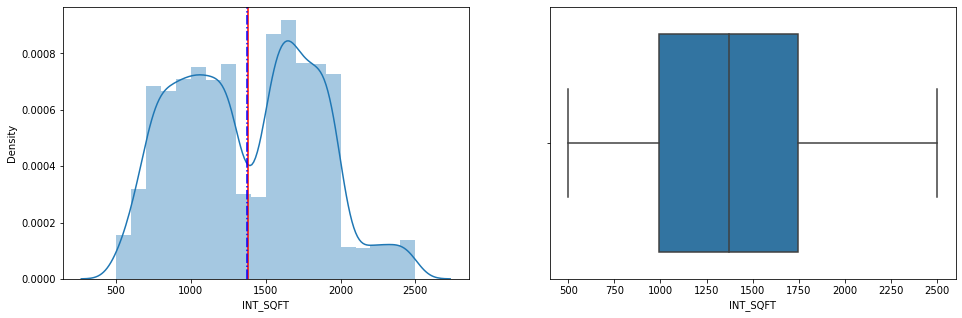

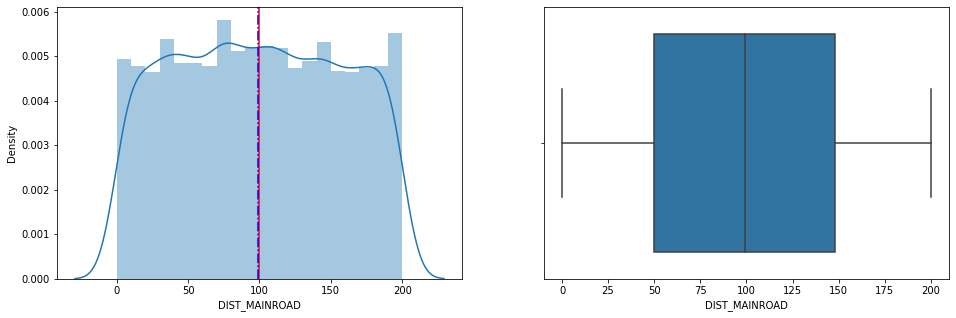

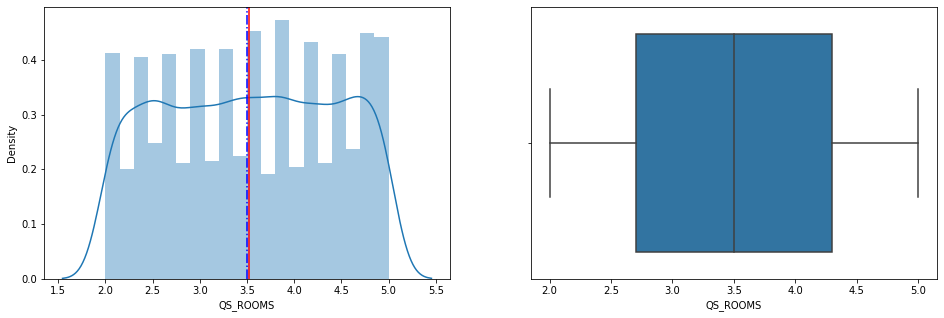

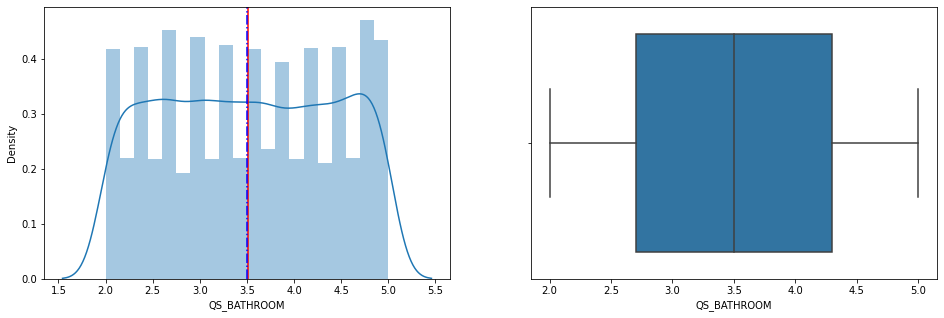

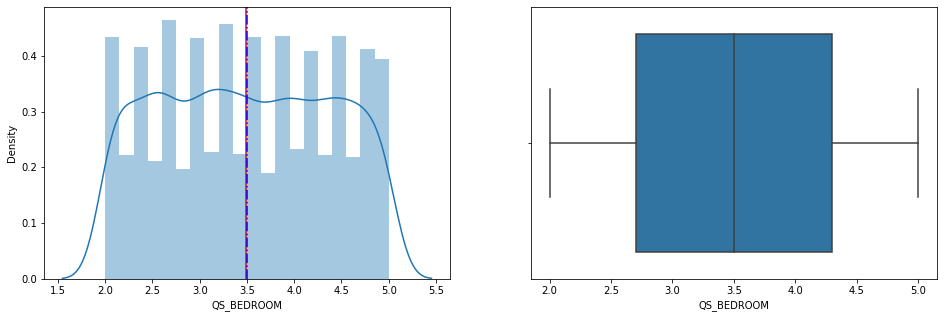

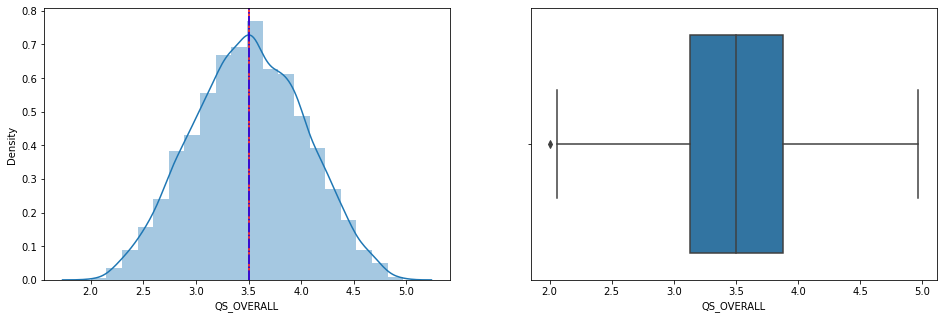

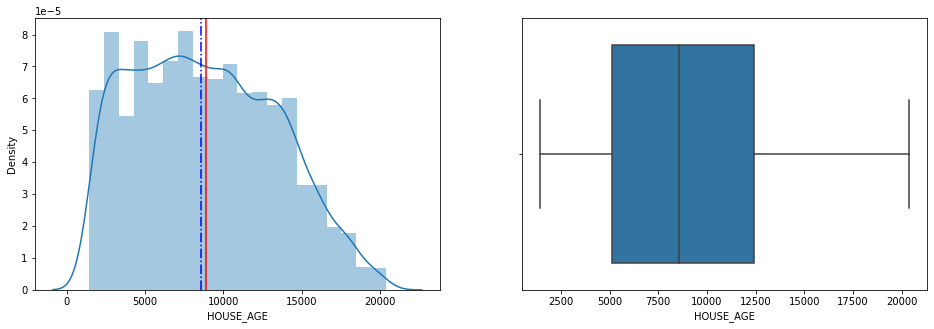

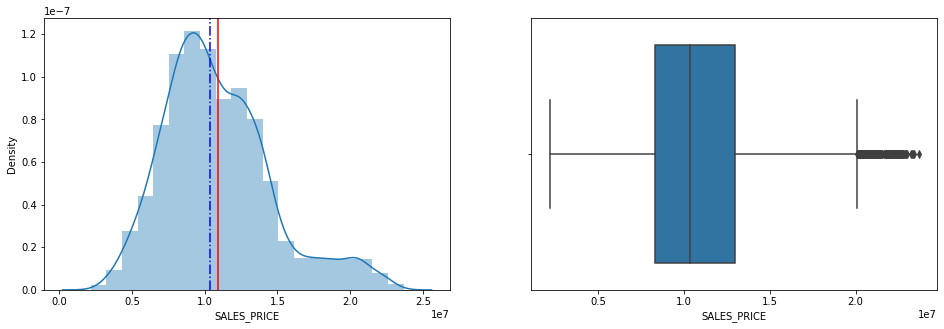

In [40]:
for col in num_col:
  plot_dist_box(df,col)



*   Here, we can see that the distribution of data are normally distributed in all the columns except few variables which are slightly skewed.
*   Target variable is slightly skewed.
*   From the boxplots of numerical columns, we can see 'QS_OVERALL' and 'SALES_PRICE' contains outliers



In [41]:
# Lower and Upper bound for QS_OVERALL column
perc_25 = df['QS_OVERALL'].quantile(0.25)
perc_75 = df['QS_OVERALL'].quantile(0.75)
iqr = perc_75 - perc_25
upper_limit = perc_75 + (1.5 * iqr)
lower_limit = perc_25 - (1.5 * iqr)
print('QS_OVERALL - Upper limit :',upper_limit, ', Lower limit :',lower_limit)

QS_OVERALL - Upper limit : 5.005 , Lower limit : 2.005


In [42]:
df[df['QS_OVERALL'] < lower_limit]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
4091,Adyar,1181,2011-06-26,156,1,1,3,partial,Yes,1987-02-07,Others,ELO,No Access,I,2.0,2.0,2.0,2.0,328316,126275,8418360,8905.0


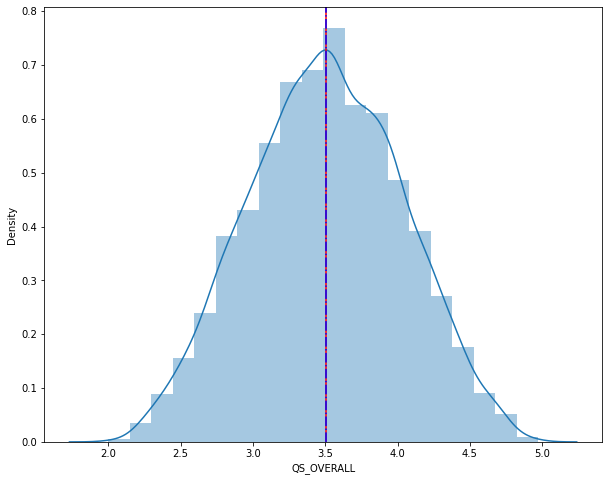

In [43]:
plt.figure(figsize=(10,8))
sns.distplot(df['QS_OVERALL'], bins = 20)
plt.axvline(x=df['QS_OVERALL'].mean(), color='red')
plt.axvline(x=df['QS_OVERALL'].median(), color='blue',ls = 'dashdot')

In QS_OVERALL column, only one row have a value lesser than the lower limit. 

However, there is not much diiferent. 

The graph looks normally distributed. So ,it won't be a problem

In [44]:
# Lower and Upper bound for SALES_PRICE column
perc_25 = df['SALES_PRICE'].quantile(0.25)
perc_75 = df['SALES_PRICE'].quantile(0.75)
iqr = perc_75 - perc_25
upper_limit = perc_75 + (1.5 * iqr)
lower_limit = perc_25 - (1.5 * iqr)
print('SALES_PRICE - Upper limit :',upper_limit, ', Lower limit :',lower_limit)

SALES_PRICE - Upper limit : 20076600.0 , Lower limit : 1189400.0


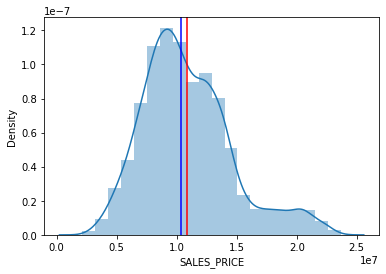

In [45]:
sns.distplot(df['SALES_PRICE'],bins = 20)
plt.axvline(x=df['SALES_PRICE'].mean(), color='red')
plt.axvline(x=df['SALES_PRICE'].median(), color='blue')
plt.show()

In [46]:
df[df['SALES_PRICE'] > upper_limit]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE
1,Anna Nagar,1986,2006-12-19,26,2,1,5,abnormal,No,1995-12-22,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,4015.0
19,Anna Nagar,1902,2012-02-07,168,2,1,5,family,Yes,1970-07-13,Commercial,ELO,Paved,RL,4.5,4.9,4.9,4.760,742113,212032,21203240,15184.0
47,Anna Nagar,1710,2009-12-11,15,1,1,4,normal sale,Yes,1998-11-15,Commercial,All Pub,Gravel,RH,2.7,4.0,2.2,2.825,808639,161728,20215970,4044.0
125,T Nagar,1973,2007-01-29,63,2,1,5,family,Yes,1972-07-02,Commercial,All Pub,Gravel,RM,2.6,2.9,4.9,3.710,885666,116535,23307000,12629.0
168,T Nagar,1926,2007-05-27,193,2,1,5,adj land,Yes,1990-05-31,Commercial,NoSewr,No Access,RM,4.2,4.9,3.1,3.880,633655,203675,22630540,6205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,T Nagar,1901,2007-12-31,83,2,1,5,normal sale,Yes,2003-01-01,Commercial,ELO,Paved,RM,4.9,2.2,2.6,3.190,610994,226294,22629400,1825.0
7008,T Nagar,1810,2014-06-06,109,2,1,5,adj land,Yes,2000-09-06,Commercial,NoSewr,No Access,RM,2.6,2.2,2.5,2.455,754472,301789,21556330,5021.0
7024,Anna Nagar,1703,2007-04-16,164,1,1,4,adj land,Yes,2002-04-17,Commercial,All Pub,Paved,RL,2.7,3.6,3.5,3.245,623468,228605,20782250,1825.0
7058,T Nagar,1858,2009-02-27,36,2,1,5,normal sale,Yes,1974-08-03,Commercial,ELO,No Access,RM,2.0,4.7,4.9,3.980,826242,169486,21185700,12627.0


There are outliers in the sales price columns which is possible in real life.

 So we leave the outliers as it is. 

# **EDA**

In [47]:
!pip install markupsafe==2.0.1
!pip install matplotlib
from markupsafe import soft_unicode
from pandas_profiling import ProfileReport


profile_report = ProfileReport(df, title="Pandas Profiling Report")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
profile_report.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Let's look at the count of categorical columns.

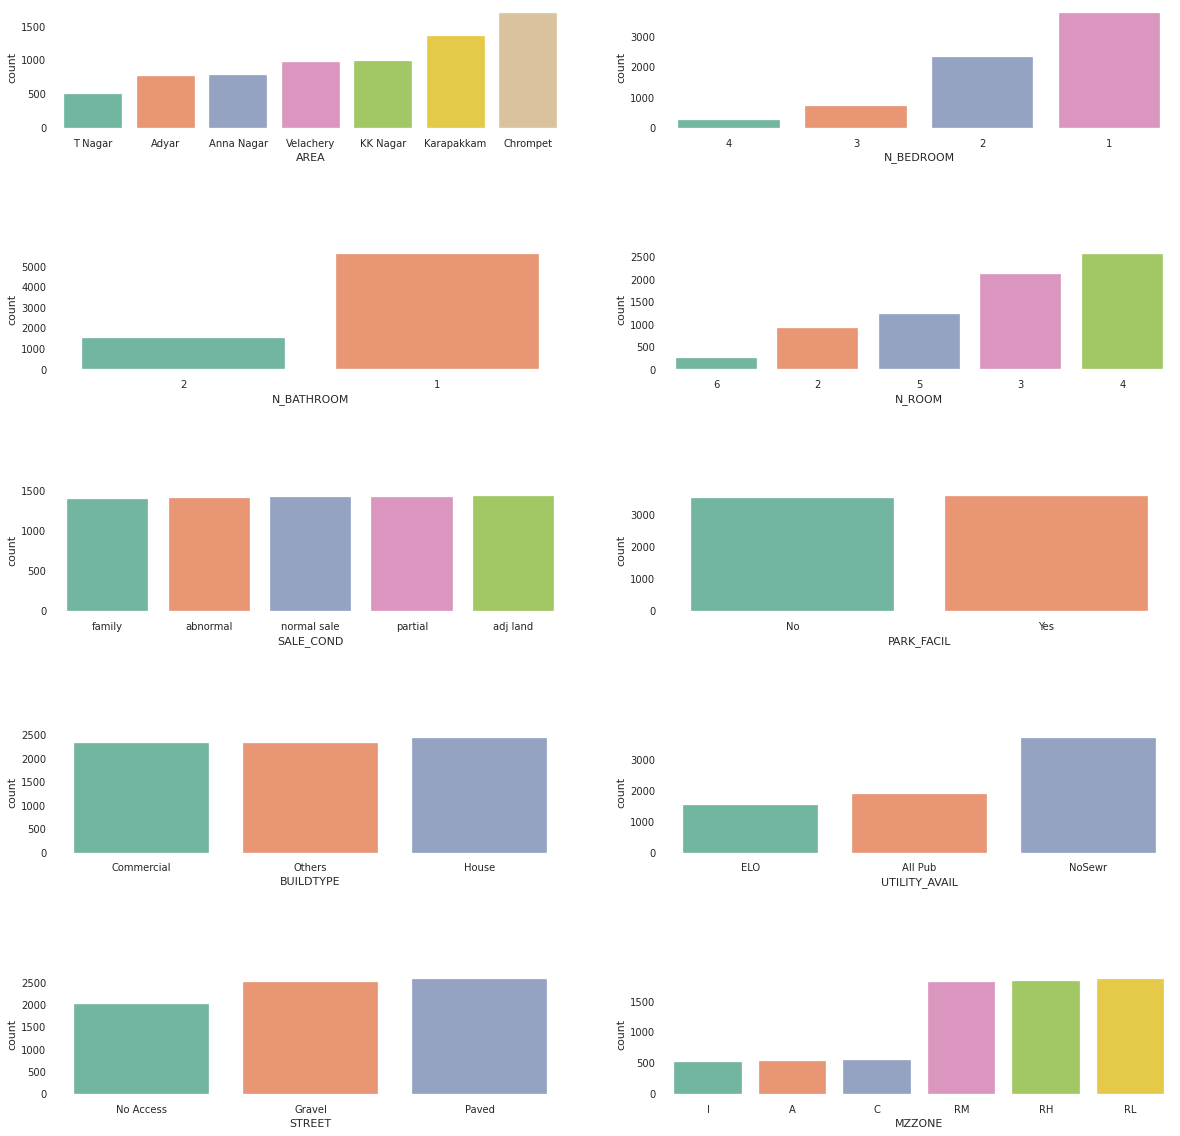

In [49]:
fig, axes = plt.subplots(5,2,figsize = (20,20))
for idx,i in enumerate(cat_col):
  row,col = idx//2, idx%2
  ord = df[i].value_counts().sort_values().index
  sns.countplot(df[i], palette = 'Set2', ax = axes[row,col], order = ord)
  
plt.subplots_adjust(hspace=1)

In [50]:
#counts of all categorical variables
val_counts = pd.DataFrame(df[cat_col].apply(lambda x: x.value_counts()).T.stack(), columns = ['Value_counts'])

val_counts

Value_counts
AREA          Adyar               774.0
              Anna Nagar          788.0
              Chrompet           1702.0
              KK Nagar            997.0
              Karapakkam         1366.0
              T Nagar             501.0
              Velachery           981.0
N_BEDROOM     1                  3796.0
              2                  2352.0
              3                   707.0
              4                   254.0
N_BATHROOM    1                  5594.0
              2                  1515.0
N_ROOM        2                   921.0
              3                  2125.0
              4                  2563.0
              5                  1246.0
              6                   254.0
SALE_COND     abnormal           1411.0
              adj land           1439.0
              family             1403.0
              normal sale        1423.0
              partial            1433.0
PARK_FACIL    No                 3522.0
              Yes                3587.0
BUILDTYPE     Commercial         2329.0
              House              2444.0
              Others             2336.0
UTILITY_AVAIL All Pub            1887.0
              ELO                1522.0
              NoSewr             3700.0
STREET        Gravel             2520.0
              No Access          2017.0
              Paved              2572.0
MZZONE        A                   537.0
              C                   550.0
              I                   525.0
              RH                 1822.0
              RL                 1858.0
              RM                 1817.0

### Categorical Columns VS Target Variable


**Area vs Sales Price**




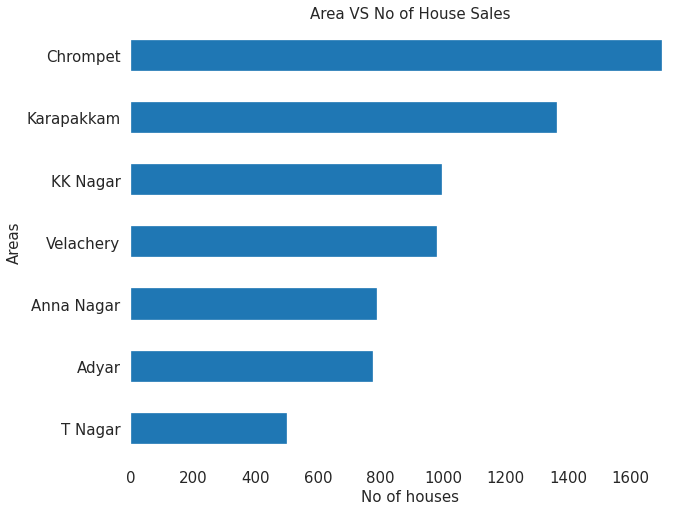

In [51]:
plt.figure(figsize = (10,8))
df['AREA'].value_counts().sort_values().plot.barh()
plt.xlabel('No of houses',fontsize = 15)
plt.ylabel('Areas',fontsize = 15)
plt.title('Area VS No of House Sales', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


*   Chrompet has maximum no of houses sold and Karapakkam is the second maximum.
*   T Nagar has minimum no of houses sold.

In [52]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

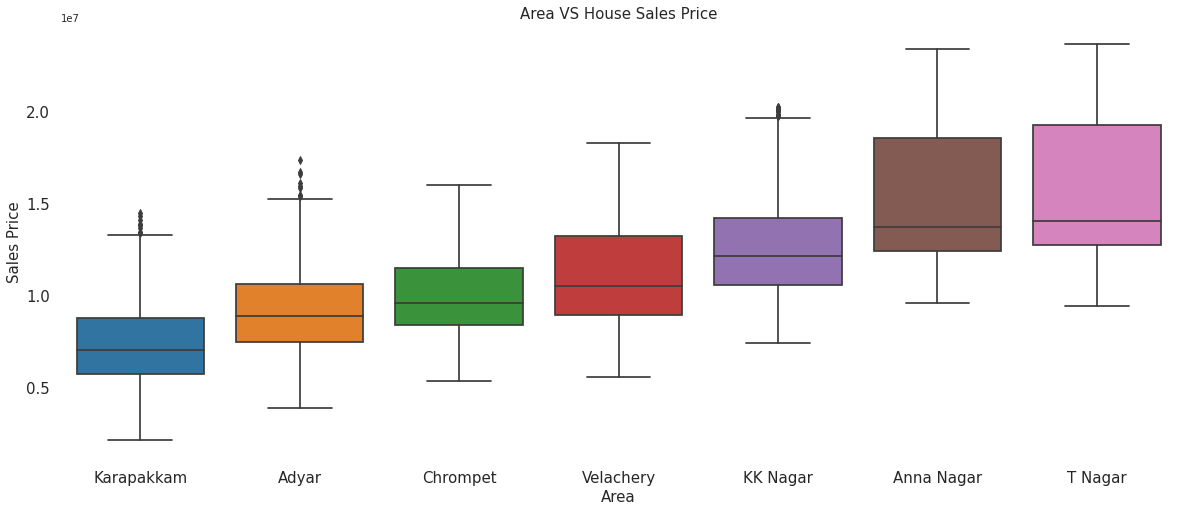

In [53]:
plt.figure(figsize = (20,8))
sns.boxplot(x='AREA',y = 'SALES_PRICE', data = df, order = area_order)
plt.xlabel('Area',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('Area VS House Sales Price', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


> 
*   **There is a linear relationship between area and sales price.**
*   There is an order in area. So we can use Label e
*   T Nagar has the highest sale price and Anna Nagar is the second highest.
*   Karapakkam has low sale price of houses.

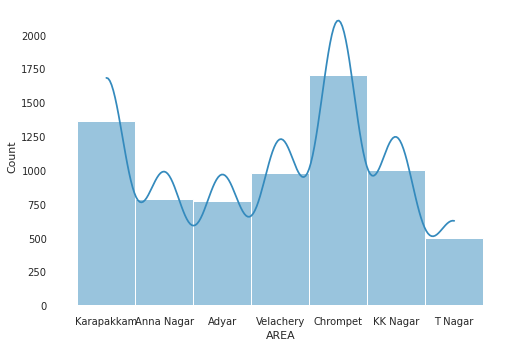

In [54]:
sns.histplot(df['AREA'], linewidth = 1, kde = True)

* Data is distributed normally in all areas.

**N_BEDROOM vs SALES_PRICE**


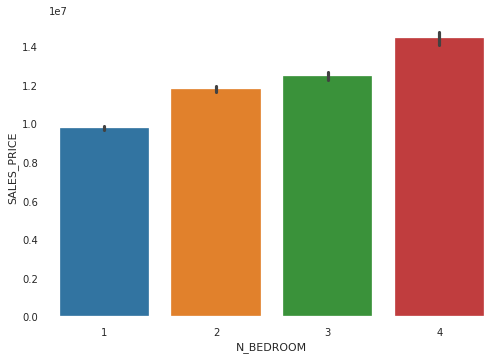

In [55]:
sns.barplot(x = 'N_BEDROOM', y = 'SALES_PRICE', data = df)

* **There is a linear relationship between sales price and nof of bedrooms.**
* No encoding required. 

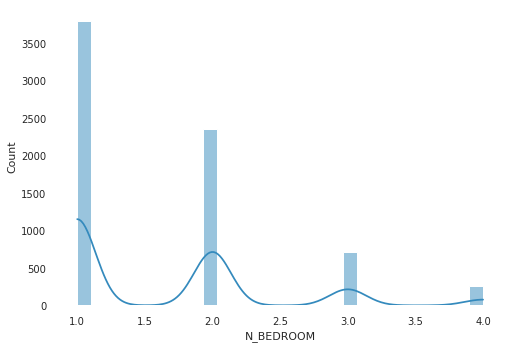

In [56]:
sns.histplot(df['N_BEDROOM'], linewidth = 1, kde = True)

*  Data is normally distributed in all bedrooms.

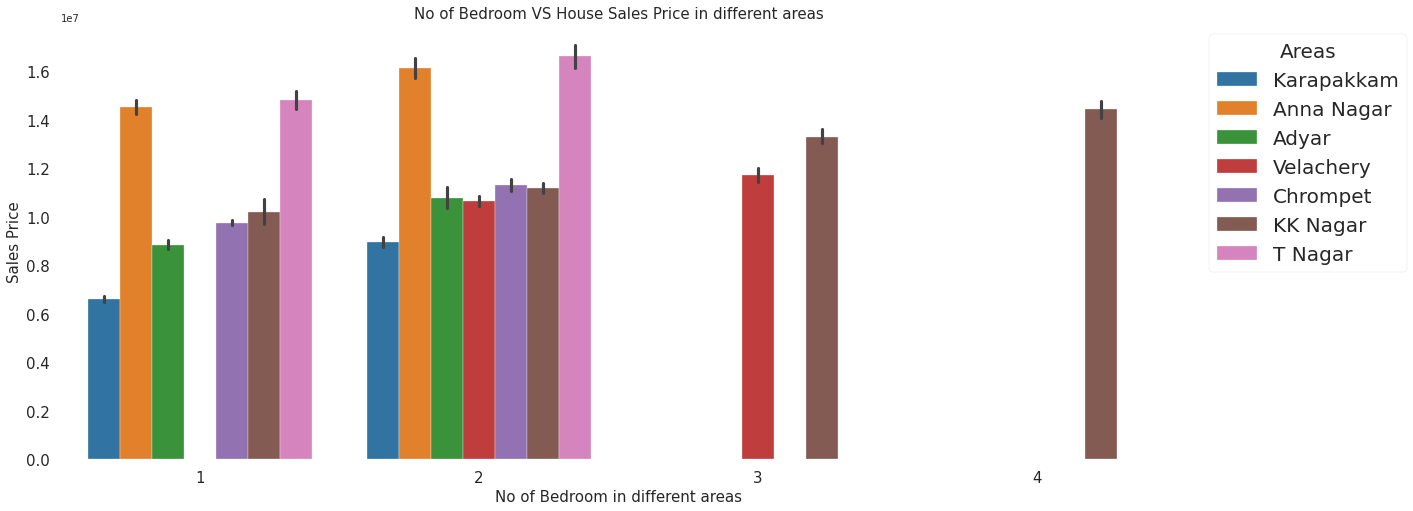

In [57]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'N_BEDROOM', y = 'SALES_PRICE', data = df, hue = 'AREA', estimator = np.mean)
plt.xlabel('No of Bedroom in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('No of Bedroom VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()

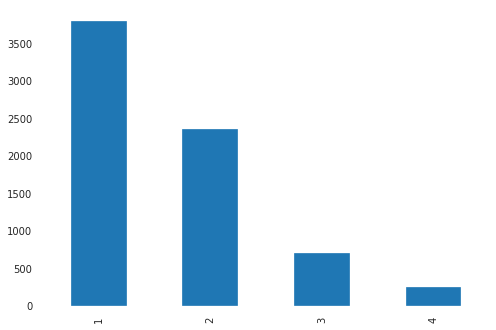

In [58]:
df['N_BEDROOM'].value_counts().plot.bar()

*   Increase in Bedrooms in houses increases the sales price.
*   T Nagar and Anna Nagar has maximum sales price with two bedrooms.
*   One bedroom houses are most sold.
*   KK Nagar contains bedrooms from 1 to 4.
*   Velachery has 2 to 3 bedrooms. Karapakkam,Anna Nagar,Adyar,Chrompet,T Nagar has 1 to 2 bedrooms.

**N_BATHROOM vs SALES_PRICE**

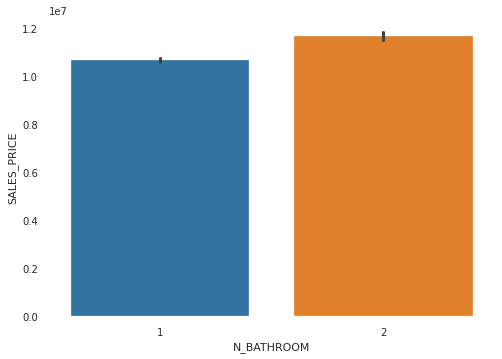

In [59]:
sns.barplot(x = 'N_BATHROOM', y = 'SALES_PRICE', data = df)

* There is linear relationship between sales price and no of bathrooms.
* No encoding required.

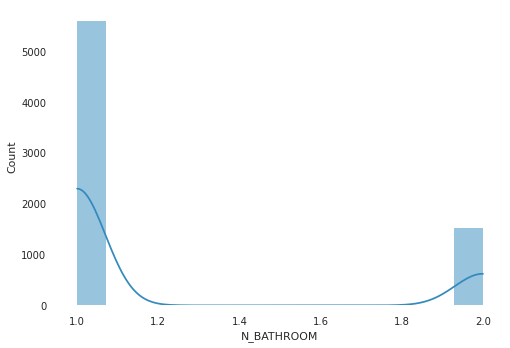

In [60]:
sns.histplot(df['N_BATHROOM'], linewidth = 0, kde = True )

Data is normally distributed in both number of bathroom.

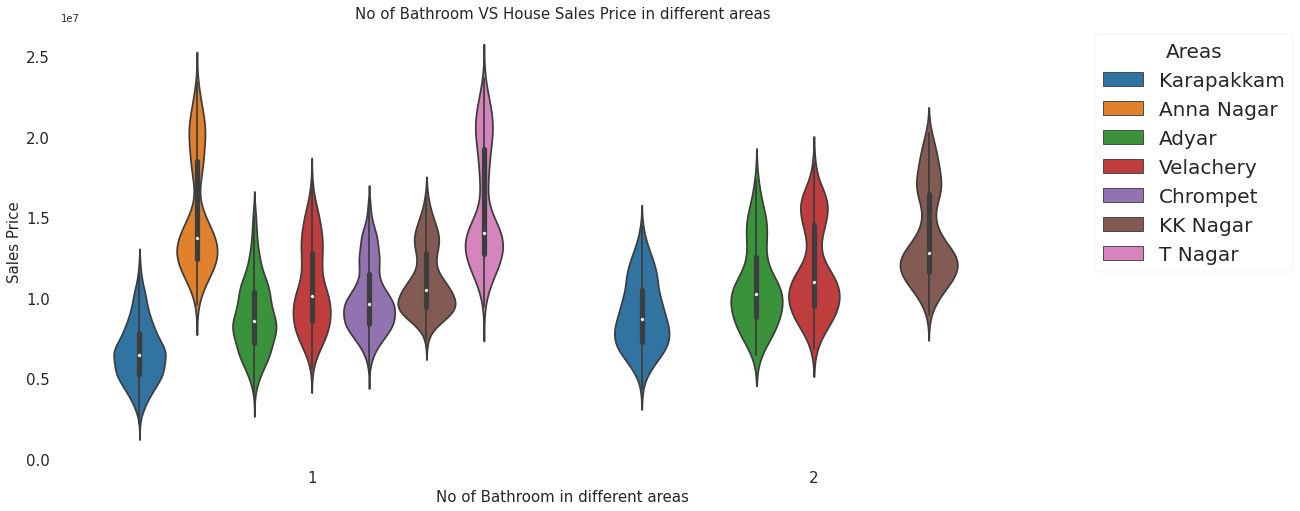

In [61]:
plt.figure(figsize = (18,8))
sns.violinplot(x = 'N_BATHROOM', y = 'SALES_PRICE', data = df, hue = 'AREA', estimator = np.median)
plt.xlabel('No of Bathroom in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('No of Bathroom VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20, title = 'Areas', title_fontsize = 20)
plt.show()

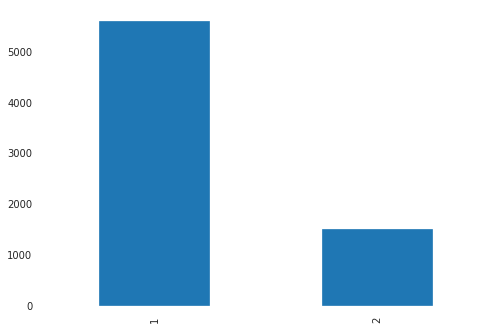

In [62]:
df['N_BATHROOM'].value_counts().plot.bar()


*   Increase in number of bathrooms in houses increses the sales price. 
*   T Nagar and Anna Nagar are the maximum sales price area with one bathroom.
*   Houses with one bathroom are most sold in all areas.
*   Anna Nagar and T Nagar have one bathrooms. Other areas have 1 to 2 bathrooms.






**N_ROOM vs SALES_PRICE**


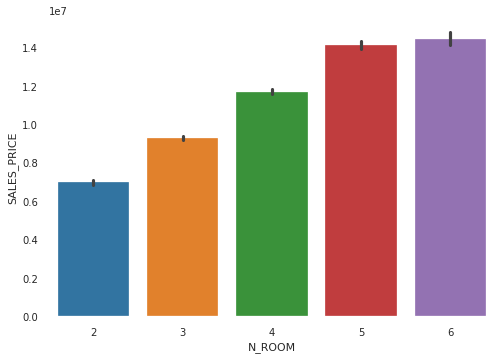

In [63]:
sns.barplot(x = 'N_ROOM', y = 'SALES_PRICE', data = df)

* There is a linear relationship between sales price and no of rooms.
* No encoding required.

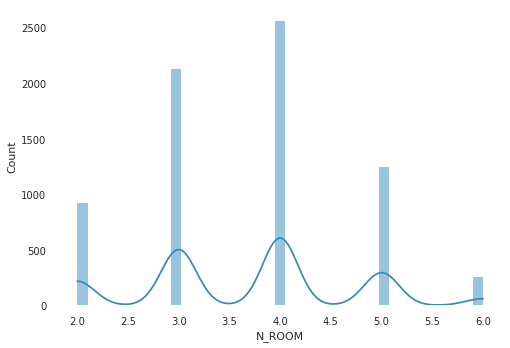

In [64]:
sns.histplot(df['N_ROOM'], linewidth = 0, kde = True)

Data is normally distributed in all rooms.

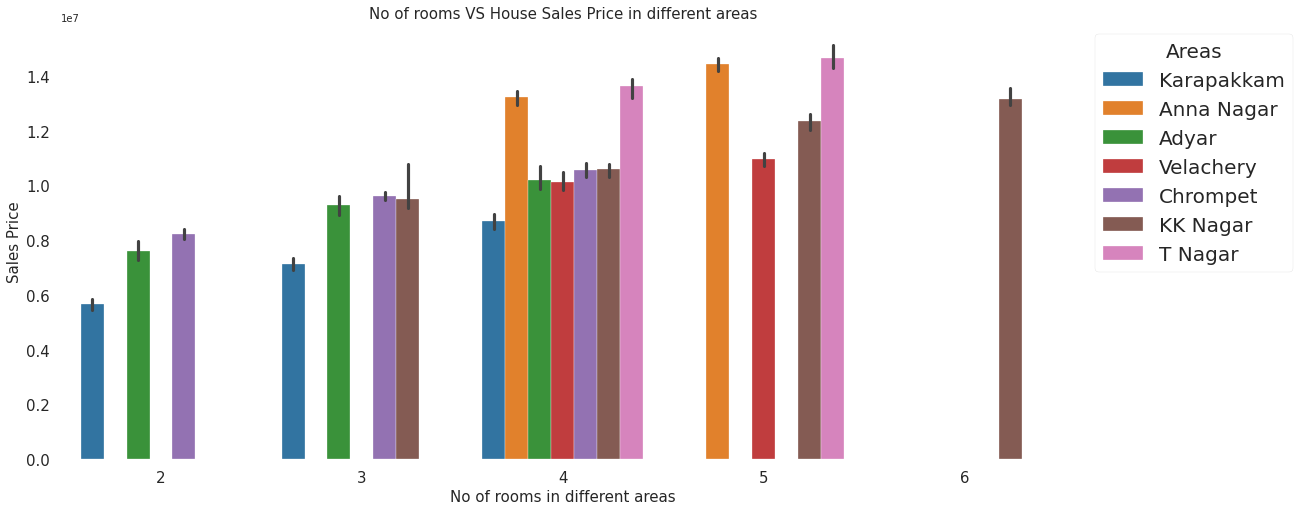

In [65]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'N_ROOM', y = 'SALES_PRICE', data = df, hue = 'AREA', estimator = np.median)
plt.xlabel('No of rooms in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('No of rooms VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()



*  Increase in number of rooms in houses increses the sales price.
*   T Nagar and Anna Nagar are maximum sales price area with 5 rooms.
*   Houses with 4 rooms are available in all areas.
*   No area contains all types of rooms.KK Nagar has 3 to 6 rooms.
*   Karapakkam,Adyar,Chrompet has 2 to 4 rooms. Anna Nagar,Velachery,T Nagar has 4 to 5 rooms.



**SALE_COND vs SALES_PRICE**

In [66]:
salecond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

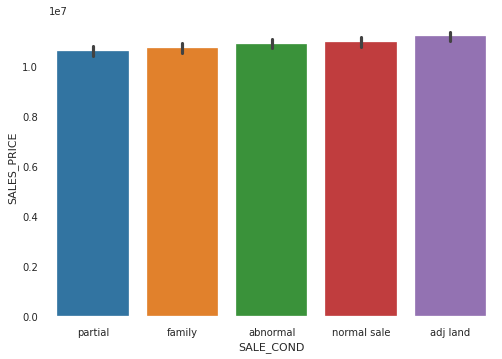

In [67]:
sns.barplot(x = 'SALE_COND', y = 'SALES_PRICE', data = df, order = salecond_order)

All types of sale condition are close to each other. 

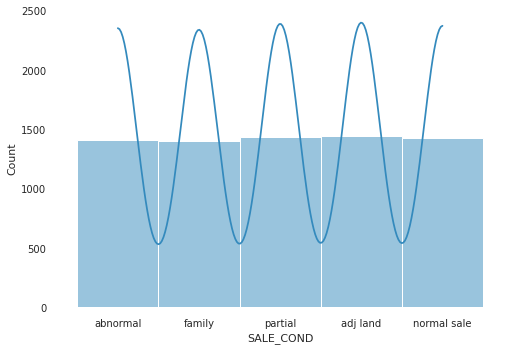

In [68]:
sns.histplot(df['SALE_COND'], linewidth = 1, kde = True)

Data is normally distributed in all types.

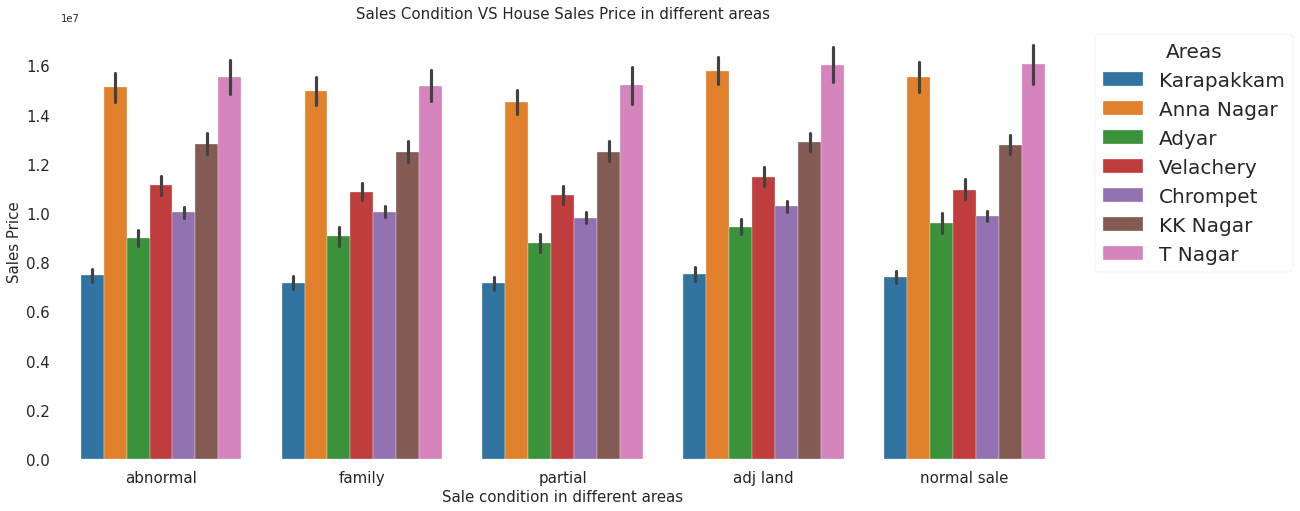

In [69]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'SALE_COND', y = 'SALES_PRICE', data = df, hue = 'AREA')
plt.xlabel('Sale condition in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('Sales Condition VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()


There is no relationship between sales price and sale condition. 

So we can drop the SALE_COND column.

**PARK_FACIL vs SALES_PRICE**


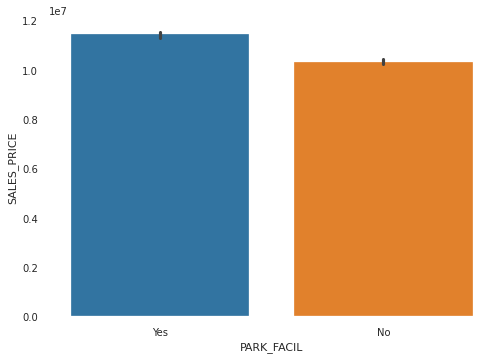

In [70]:
sns.barplot(x = 'PARK_FACIL', y = 'SALES_PRICE', data = df)



*   There is a linear relationship between sales price and parking facility.  
*   It is binary categorrical column. We can use label encoding.

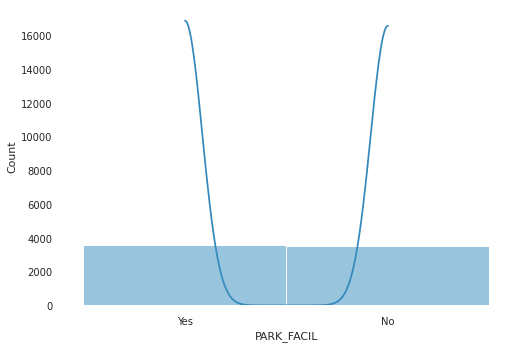

In [71]:
sns.histplot(df['PARK_FACIL'], linewidth = 1, kde = True)

Data is normally distributed.

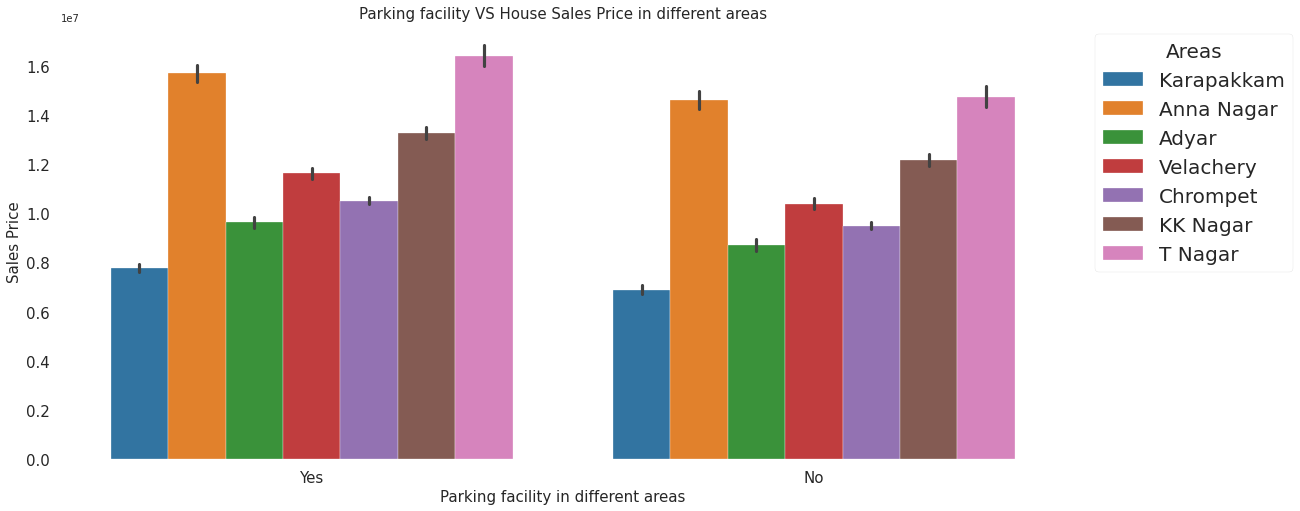

In [72]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'PARK_FACIL', y = 'SALES_PRICE', data = df, hue = 'AREA')
plt.xlabel('Parking facility in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('Parking facility VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()

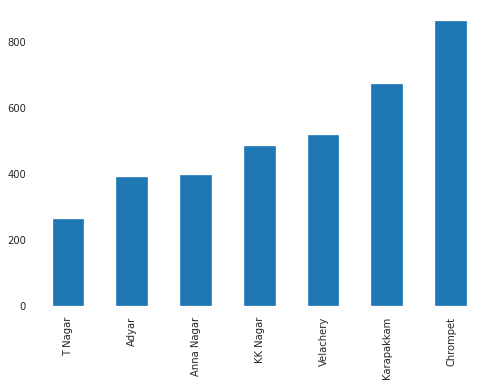

In [73]:
# Count of houses with parking facility in different areas in chennai
df[df['PARK_FACIL'] == 'Yes'].AREA.value_counts().sort_values().plot.bar()


*   Sales Prices are more in houses with parking facility than in houses with no parking facility.
*   Chrompet has more houses with parking facility while T Nagar has less houses with parking facility.

**BUILDTYPE vs SALES_PRICE**

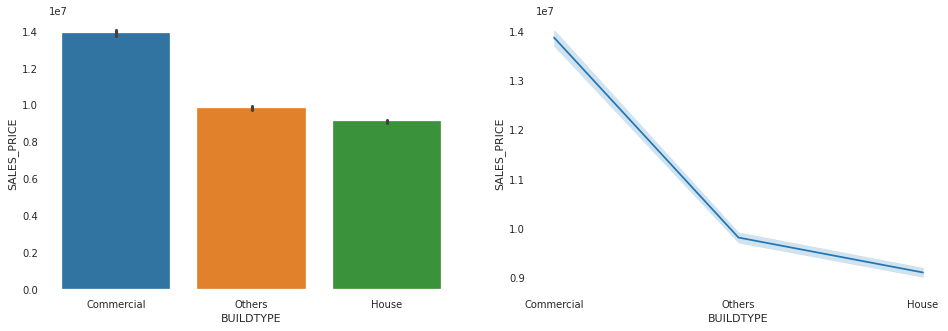

In [74]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.barplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df)
plt.subplot(1,2,2)
sns.lineplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df)

plt.subplots_adjust(hspace=1)


*   There is a relationship between sales price and build type, but there is no linear relationship.
*   We will use one hot encoding.



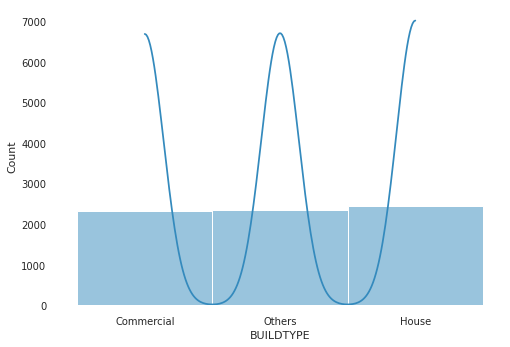

In [75]:
sns.histplot(df['BUILDTYPE'], linewidth = 1, kde = True)

Data is normally distributed in all three types.

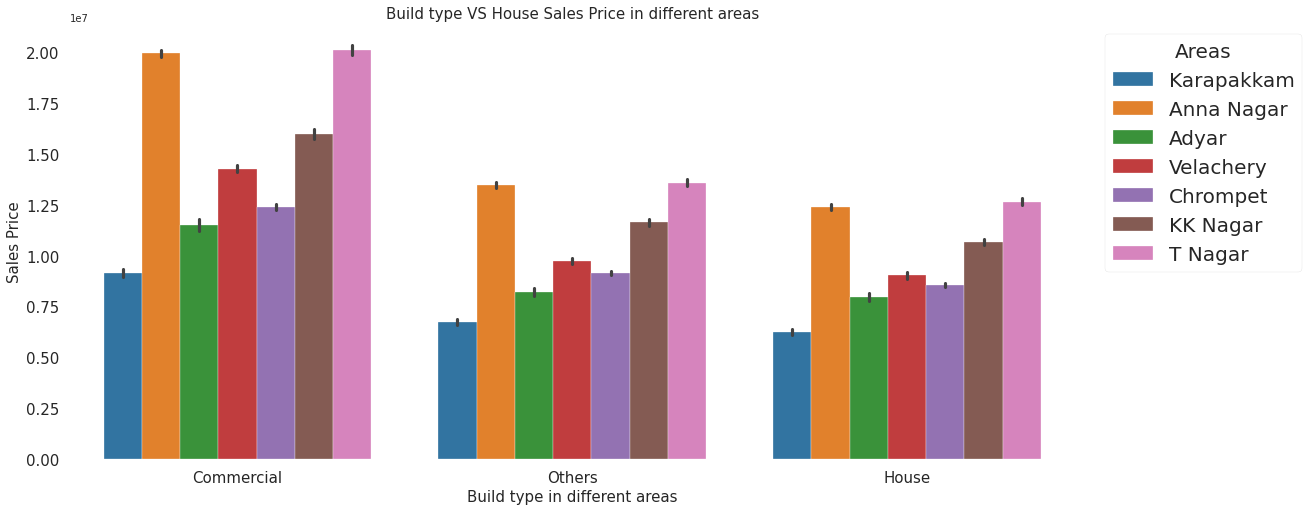

In [76]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df, hue = 'AREA')
plt.xlabel('Build type in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('Build type VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()



*   Commercial type has the higher sales price.
*   Anna Naga and T Nagar have higher sales price every build type.
*   All three types of build types are available in all areas.

**UTILITY_AVAIL vs SALES_PRICE**

In [77]:
utility_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']

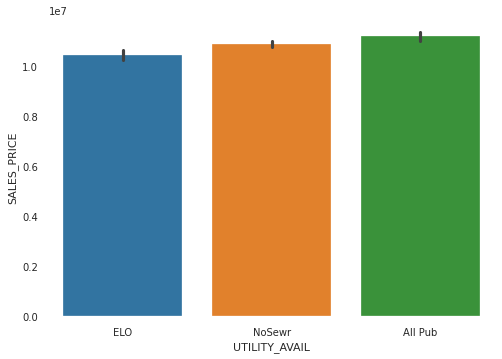

In [78]:
sns.barplot(x = 'UTILITY_AVAIL', y = 'SALES_PRICE', data = df, order = utility_order)



*   There is a slight linear relaionship between sales price and utility available. 
*   There is an order in the column. So we can use label encoding.



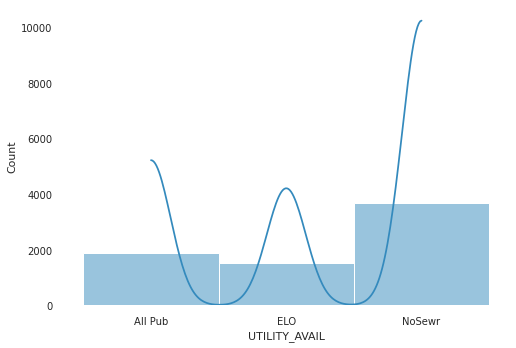

In [79]:
sns.histplot(df['UTILITY_AVAIL'], linewidth = 1, kde = True)

Data is normally distributed in all three types.

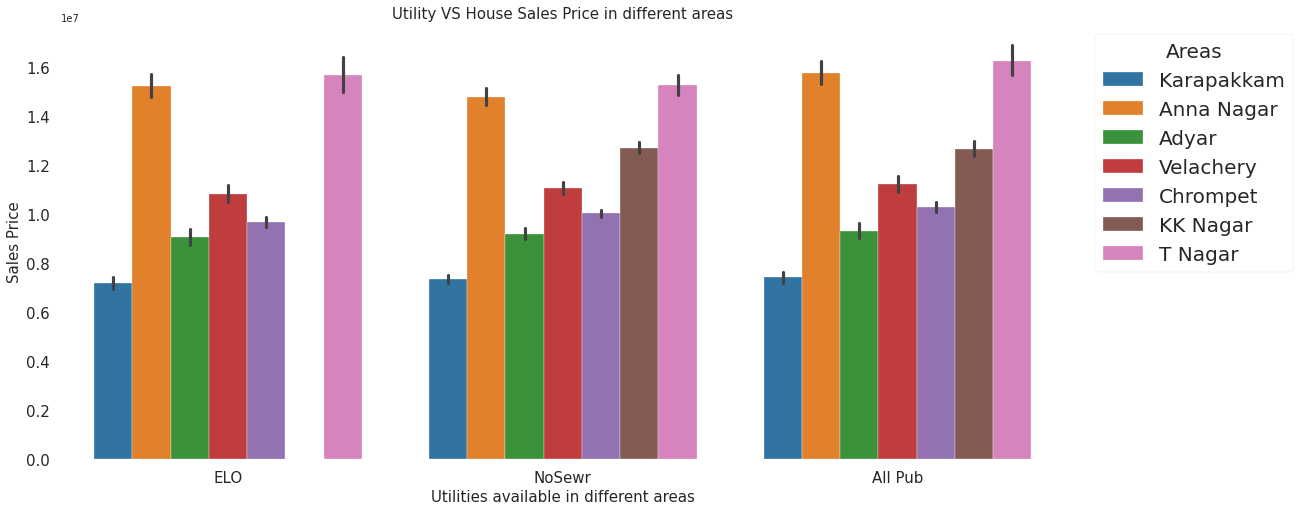

In [80]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'UTILITY_AVAIL', y = 'SALES_PRICE', data = df, hue = 'AREA', order = utility_order)
plt.xlabel('Utilities available in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('Utility VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()

* Houses with all Public utilities are more expensive than other types.
* All three utilities are available in all areas except KK Nagar. 
* KK nagar have only No sewer and All Pub. 

**STREET vs SALES_PRICE**

In [81]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

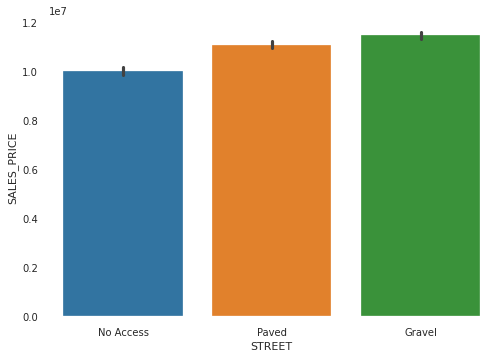

In [82]:
sns.barplot(x = 'STREET', y = 'SALES_PRICE', data = df, order = street_order)

*  There is a slight linear relationship between sales price and street.
*  There is an order in the column.So we can use label encoding.

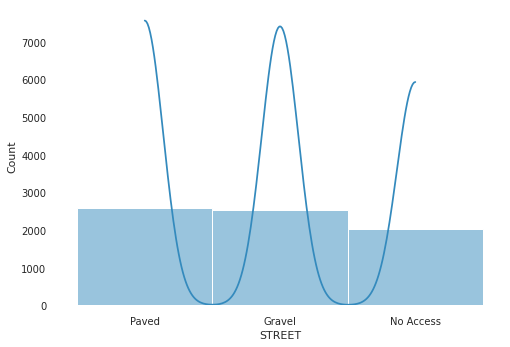

In [83]:
sns.histplot(df['STREET'], linewidth = 1, kde = True)

Data is normally distributed in all three types.

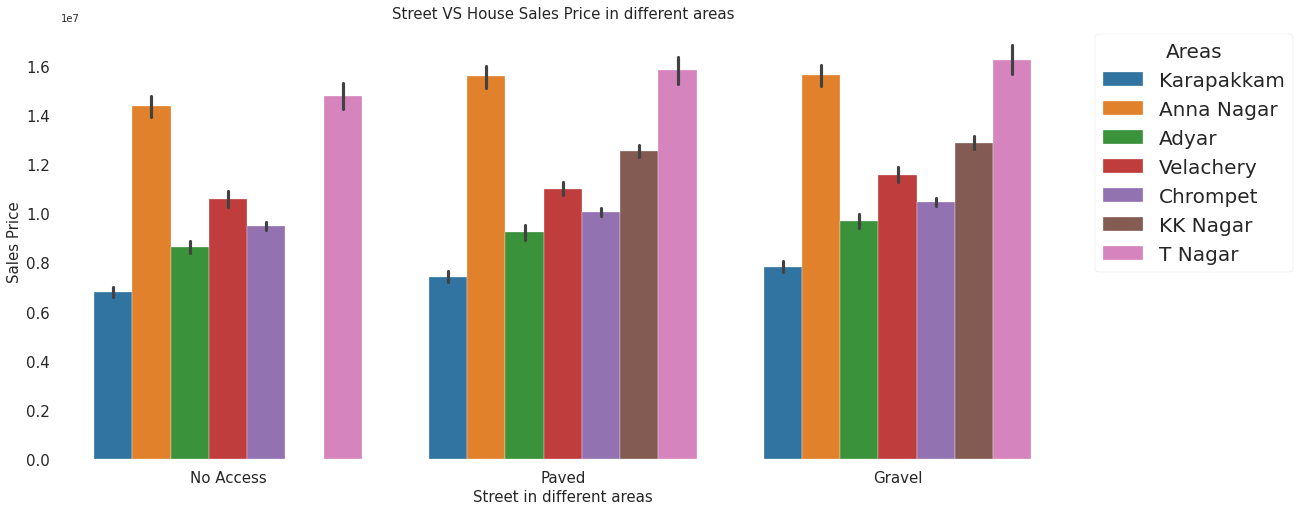

In [84]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'STREET', y = 'SALES_PRICE', data = df, hue = 'AREA', order = street_order)
plt.xlabel('Street in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('Street VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()

* Gravel streets are more expensive than other types.
* All three types are available in all areas except KK Nagar.
* KK Nagar have only Paved and Gravel street. 

**MZZONE vs SALES_PRICE**

In [85]:
zone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']

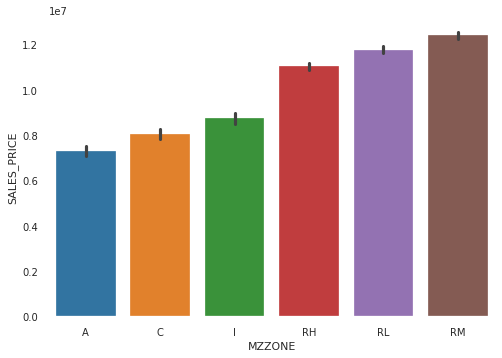

In [86]:
sns.barplot(x = 'MZZONE', y = 'SALES_PRICE', data = df, order = zone_order)

* There is a piecewise linear relationship, i.e. A, C, I follows a linear relation and RH, RL, RM follows another lineear relation.
* There is a big differnece between I and RH as compared to others.
* There is an order in the column, we can use label encoding.
* Due to the big difference, we will skip the number 3.
* A - 0, C - 1, I - 2, RH - 4, RL - 5, RM - 6 

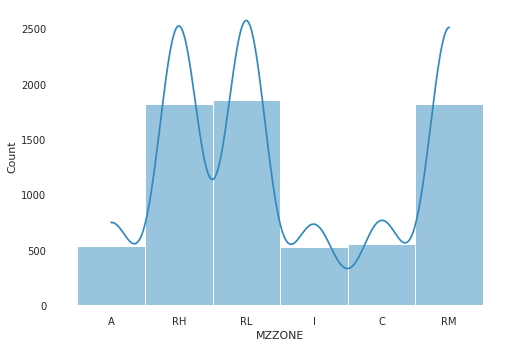

In [87]:
sns.histplot(df['MZZONE'], linewidth = 1, kde = True)

Data is normally distributed in all types of zones.

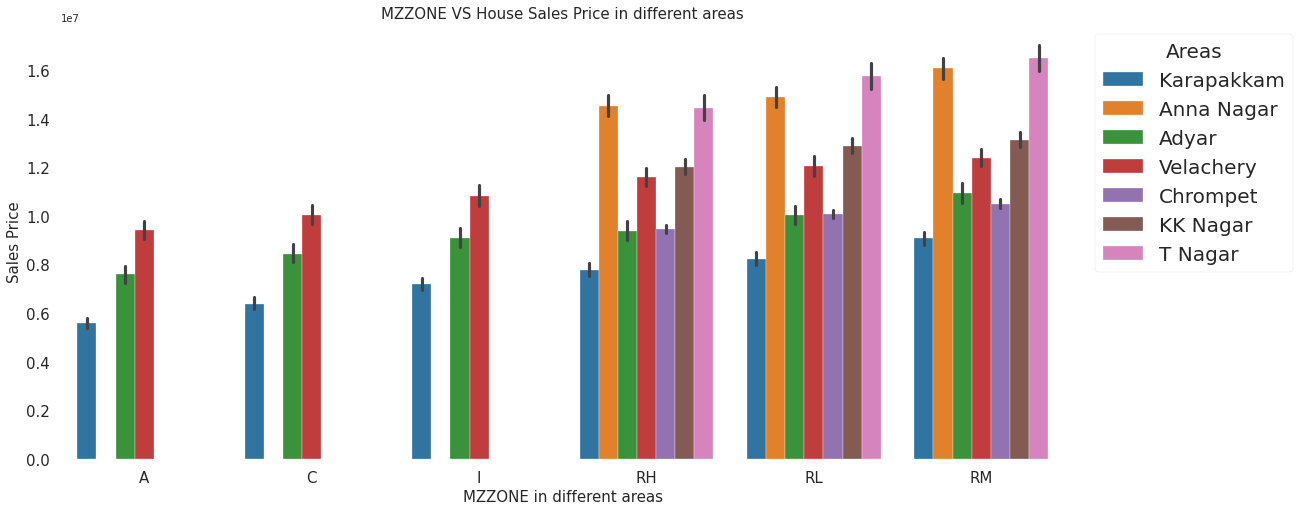

In [88]:
plt.figure(figsize = (18,8))
sns.barplot(x = 'MZZONE', y = 'SALES_PRICE', data = df, hue = 'AREA', order = zone_order)
plt.xlabel('MZZONE in different areas',fontsize = 15)
plt.ylabel('Sales Price',fontsize = 15)
plt.title('MZZONE VS House Sales Price in different areas', fontsize = 15)
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize = 20,title = 'Areas', title_fontsize = 20)
plt.show()

* Houses in RM zone are more expensive than other zones.
* RH, RL, RM zones are available in all areas.
* A, C, I zones are available only in Karapakkam, Adyar, Velachery. 

### Numerical Columns vs Target Variable

**INT_SQFT vs SALES_PRICE**

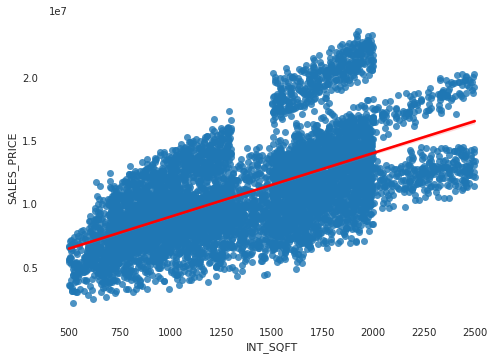

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


In [89]:
sns.regplot(x = df['INT_SQFT'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['INT_SQFT','SALES_PRICE']].corr()

There is a good lineear relationship between square feet and sales price. 

**DIST_MAINROAD vs SALES_PRICE**

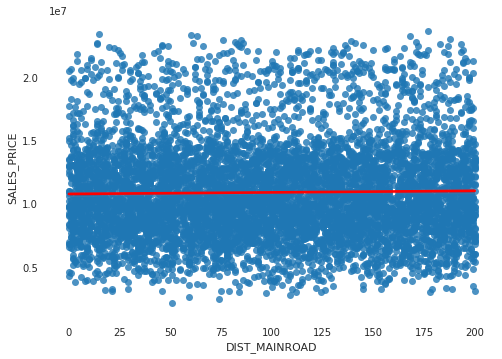

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


In [90]:
sns.regplot(x = df['DIST_MAINROAD'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['DIST_MAINROAD','SALES_PRICE']].corr()

There is no relation between DIST_MAINROAD and SALES_PRICE.

So, we can drop the feature.

**QS_ROOMS vs SALES_PRICE**

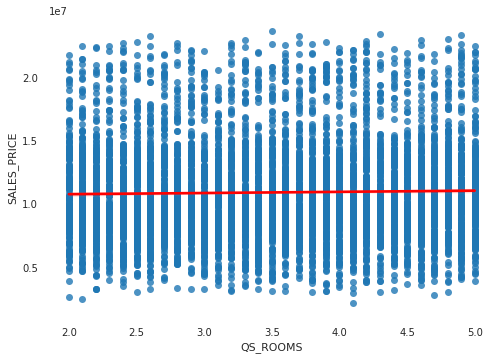

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


In [91]:
sns.regplot(x = df['QS_ROOMS'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['QS_ROOMS','SALES_PRICE']].corr()

This feature has no relation with the sales price.

So, we can drop the feature.

**QS_BATHROOM vs SALES_PRICE**

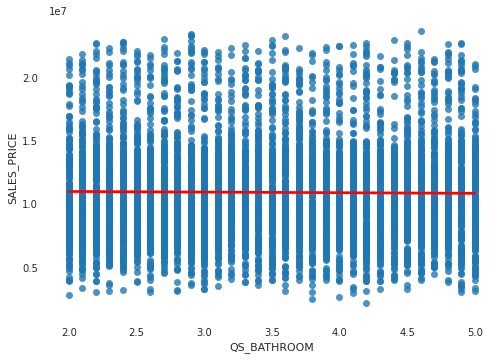

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


In [92]:
sns.regplot(x = df['QS_BATHROOM'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['QS_BATHROOM','SALES_PRICE']].corr()

This feature has no relation with the sales price.

So, we can drop the feature.

**QS_BEDROOM vs SALES_PRICE**

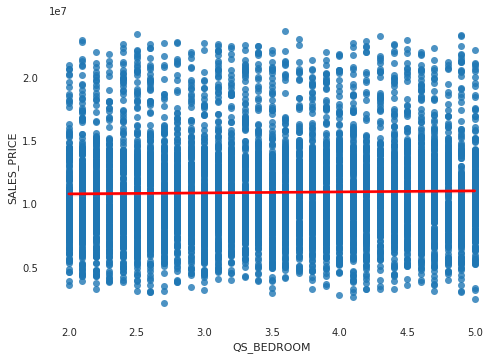

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


In [93]:
sns.regplot(x = df['QS_BEDROOM'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['QS_BEDROOM','SALES_PRICE']].corr()

This feature has no relation with the sales price.

So, we can drop the feature.

**QS_OVERALL vs SALES_PRICE**

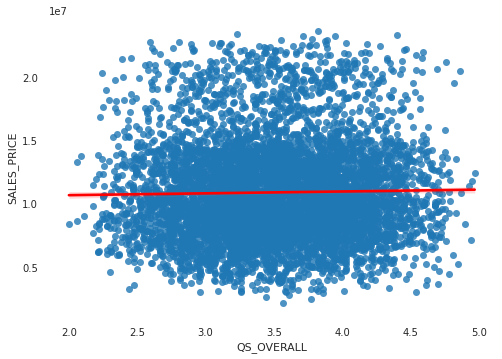

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


In [94]:
sns.regplot(x = df['QS_OVERALL'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['QS_OVERALL','SALES_PRICE']].corr()

This feature has no relation with the sales price.

So, we can drop the feature.

**HOUSE_AGE vs SALES_PRICE**

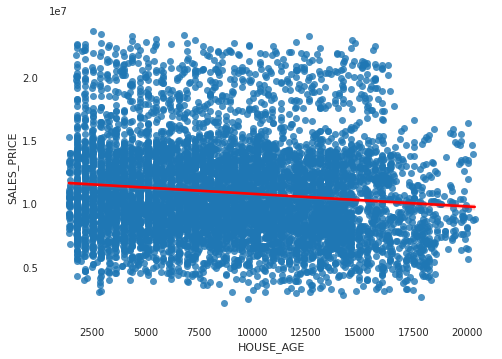

,HOUSE_AGE,SALES_PRICE
HOUSE_AGE,1.000000,-0.119285
SALES_PRICE,-0.119285,1.000000


In [95]:
sns.regplot(x = df['HOUSE_AGE'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['HOUSE_AGE','SALES_PRICE']].corr()

This feature have a less relation with sales price.

As the age increases, sales price slightly decresees.

So we will keep this feature.

**REG_FEE and COMMIS vs SALES_PRICE**

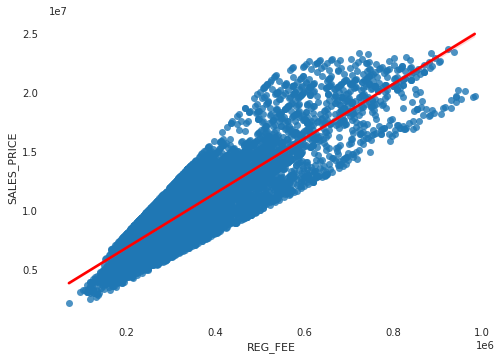

,REG_FEE,SALES_PRICE
REG_FEE,1.000000,0.878148
SALES_PRICE,0.878148,1.000000


In [96]:
sns.regplot(x = df['REG_FEE'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['REG_FEE','SALES_PRICE']].corr()

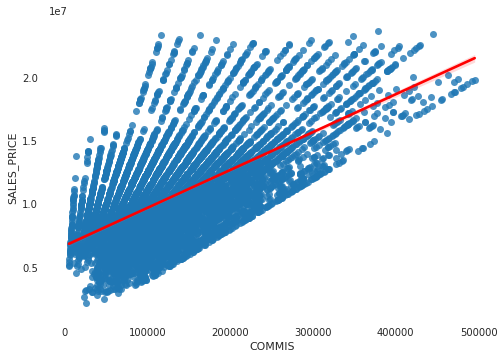

,COMMIS,SALES_PRICE
COMMIS,1.000000,0.626275
SALES_PRICE,0.626275,1.000000


In [97]:
sns.regplot(x = df['COMMIS'], y = df['SALES_PRICE'],line_kws = {'color':'red'})
plt.show()
df[['COMMIS','SALES_PRICE']].corr()

Registration fees and commission are determined after fixing the sales price. It does not affect the sales price. 

Hence, it can be removed.

**Insights from Analysis**

* Distribution of categorical variables are normally distributed.

* Distribution of numerical columns which we have seen in outliers section are normally distributed, except a few columns which are very lightly skewed.

* AREA, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, HOUSE_AGE have a strong relationship with SALES_PRICE.

* DIST_MAINROAD, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL, REG_FEE, COMMIS, SALE_COND are having no relationship with SALES_PRICE.

**Dropping unwanted columns**



In [98]:
df.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALE_COND','DATE_BUILD','DATE_SALE'], axis =1, inplace =True)

In [99]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'HOUSE_AGE'],
      dtype='object')

**Factors that help sellers to fetch more money for the houses:**

* Houses in Anna Nagar and T Nagar areas.

* More bedrooms, rooms and bathrooms.

* Parking Facility.

* Commercial Type Houses.

* Gravel type streets.

* Houses in RL and RM zones.

* More Square Feet.

# **Encoding the data**

* AREA - Label Encoding
* PARK_FACIL - Label Encoding
* BUILDTYPE - One Hot Encoding
* UTILITY_AVAIL - Label Encoding
* STREET - Label Encoding
* MZZONE - Label Encoding

In [100]:
df_copy = df.copy()

In [101]:
df['AREA'] = df['AREA'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1,'No':0})

df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO':0,'NoSewr':1,'All Pub':2})

df['STREET'] = df['STREET'].map({'No Access':0,'Paved':1,'Gravel':2})

df['MZZONE'] = df['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

In [102]:
df = pd.get_dummies(df, columns = ['BUILDTYPE'])

Changing the order of columns.

In [103]:
df = df[[ col for col in df.columns if col != 'SALES_PRICE' ] + ['SALES_PRICE'] ]

In [104]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,0,1004,1,1,3,1,2,1,0,16031.0,1,0,0,7600000
1,5,1986,2,1,5,0,2,2,4,4015.0,1,0,0,21717770
2,1,909,1,1,3,1,0,2,5,7152.0,1,0,0,13159200
3,3,1855,3,2,5,0,1,1,2,8030.0,0,0,1,9630290
4,0,1226,1,1,3,1,2,2,1,10802.0,0,0,1,7406250


# **Splitting the data**

In [105]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [107]:
x_train.shape, x_test.shape

((5687, 13), (1422, 13))

# **Scaling**

Here we are using Standard scaler to scale the data.



In [108]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

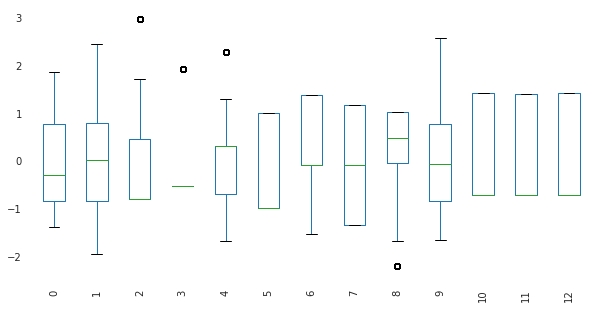

In [109]:
pd.DataFrame(x_train_scaled).plot.box(figsize = (10,5), rot = 90)

The spread of values between all the features becomes equal.

# **Bulding the models**

Creaing a Dataframe for adding the results.

In [110]:
tab_col={'Model Name':[], 'Mean_Absolute_Error_MAE':[]  ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'R2_score':[], 'R2_Score_Percent':[]}
result = pd.DataFrame(tab_col)

## Linear Regression

**Model fitting**

In [111]:
LR = LinearRegression()

LR.fit(x_train_scaled, y_train)

LinearRegression()

**Predicting the values**

In [112]:
y_pred_lr= LR.predict(x_test_scaled)

**Evaluation of Metrics**

In [113]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_lr),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_lr),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_lr),6))

Mean Absolute Error (MAE): 799098.106
Mean Squared Error (MSE): 1106682886780.708
Root Mean Squared Error (RMSE): 1051989.965
R2_score: 0.921857


**Adding the Result to the Dataframe**

In [114]:
row = {'Model Name' : 'Linear Regression',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_lr),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_lr),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),
      'R2_score' : metrics.r2_score(y_test, y_pred_lr),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_lr),3) * 100}
result = result.append(row,ignore_index=True)

## K Nearest Neighbour

**Hyper Parameter Tuning using Hit and Trial**

In [115]:
for i in [1,2,3,4,5,6,7,8,9,10,12,15,20,30,40,50,100]:
  knn = KNeighborsRegressor(i)
  knn.fit(x_train_scaled, y_train)
  print('K =',i,' Train score :', knn.score(x_train_scaled, y_train), ' Cross val score :',np.mean(cross_val_score(knn, x_train_scaled, y_train, cv = 10)))

K = 1  Train score : 1.0  Cross val score : 0.9342930374957981
K = 2  Train score : 0.9844888201557964  Cross val score : 0.9485361577904895
K = 3  Train score : 0.9782454200934912  Cross val score : 0.9510775841272274
K = 4  Train score : 0.9736582411564826  Cross val score : 0.9503883265495581
K = 5  Train score : 0.9700962443798422  Cross val score : 0.9503868327152569
K = 6  Train score : 0.9670697934428144  Cross val score : 0.9502027213950622
K = 7  Train score : 0.9649406795494044  Cross val score : 0.9497762199963938
K = 8  Train score : 0.9631295797846218  Cross val score : 0.9488066439924168
K = 9  Train score : 0.9615983403112631  Cross val score : 0.9480655710348372
K = 10  Train score : 0.9597559203463345  Cross val score : 0.9474241520967315
K = 12  Train score : 0.9571201569252071  Cross val score : 0.9463435093535196
K = 15  Train score : 0.9536319079096169  Cross val score : 0.9439328393166078
K = 20  Train score : 0.9481405321571723  Cross val score : 0.93946003801166

K = 5  gives the better Cross validation Score most of the time.


So we use K = 5 for model fitting.

**Model fitting**

In [116]:
knn = KNeighborsRegressor(5)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

**Predicting the values**

In [117]:
y_pred_knn = knn.predict(x_test_scaled)

**Evaluation of Metrics**

In [118]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_knn),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_knn),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_knn),6))

Mean Absolute Error (MAE): 600483.038
Mean Squared Error (MSE): 618694882254.142
Root Mean Squared Error (RMSE): 786571.6
R2_score: 0.956314


**Adding the Result to the Dataframe**

In [119]:
row = {'Model Name' : 'KNeighborsRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_knn),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_knn),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)),
      'R2_score' : metrics.r2_score(y_test, y_pred_knn),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_knn),3) * 100}
result = result.append(row,ignore_index=True)

## Decision Tree

**Hyper Parameter Tuning using Hit and Trial**

In [120]:
for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20,25,30,35,40,50]:
  dt = DecisionTreeRegressor(max_depth = depth)
  dt.fit(x_train_scaled,y_train)
  train_score = dt.score(x_train_scaled, y_train)
  print('Depth =',depth, ' Training score :',train_score , 'Cross val score :',np.mean(cross_val_score(dt, x_train_scaled,y_train, cv = 10)))

Depth = 1  Training score : 0.3601312763288088 Cross val score : 0.35723939585729325
Depth = 2  Training score : 0.6870754915405897 Cross val score : 0.6848257412262561
Depth = 3  Training score : 0.8063006924431586 Cross val score : 0.804605105596346
Depth = 4  Training score : 0.8886996522702615 Cross val score : 0.8842484592256286
Depth = 5  Training score : 0.9230960807293781 Cross val score : 0.9168475493809349
Depth = 6  Training score : 0.9448750141453258 Cross val score : 0.9383150530570366
Depth = 7  Training score : 0.960253055538149 Cross val score : 0.9515229908871266
Depth = 8  Training score : 0.9736005254588715 Cross val score : 0.9619907977640061
Depth = 9  Training score : 0.9828591095529412 Cross val score : 0.9682340500343235
Depth = 10  Training score : 0.9894172665917601 Cross val score : 0.9718012636415632
Depth = 12  Training score : 0.997069008645028 Cross val score : 0.9741504048669156
Depth = 15  Training score : 0.9997891441193217 Cross val score : 0.97367775

Depth = 25 gives better cross validation score most of the times.

So we fit the model with Depth = 25.

**Model fitting**

In [121]:
dt = DecisionTreeRegressor(max_depth = 25)

dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor(max_depth=25)

**Predicting the values**

In [122]:
y_pred_dt = dt.predict(x_test_scaled)

**Evaluation of Metrics**

In [123]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_dt),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_dt),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_dt),6))

Mean Absolute Error (MAE): 459552.489
Mean Squared Error (MSE): 342593361406.962
Root Mean Squared Error (RMSE): 585314.754
R2_score: 0.97581


**Adding the Result to the Dataframe**

In [124]:
row = {'Model Name' : 'DecisionTreeRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_dt),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_dt),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)),
      'R2_score' : metrics.r2_score(y_test, y_pred_dt),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_dt),3) * 100}
result = result.append(row,ignore_index=True)

In [125]:
result

,Model Name,Mean_Absolute_Error_MAE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,R2_score,R2_Score_Percent
0,Linear Regression,799098.106254,1.106683e+12,1.051990e+06,0.921857,92.2
1,KNeighborsRegressor,600483.037975,6.186949e+11,7.865716e+05,0.956314,95.6
2,DecisionTreeRegressor,459552.489451,3.425934e+11,5.853148e+05,0.975810,97.6


## Bagging (Bootstrap aggregation)

**Hyper Parameter Tuning using Hit and Trial**

In [126]:
for n in [50,100,150,200]:
  bg = BaggingRegressor(n_estimators=n)
  bg.fit(x_train_scaled,y_train)
  train_score = bg.score(x_train_scaled, y_train)
  print('N =',n, ' Training score :',train_score , 'Cross val score :',np.mean(cross_val_score(bg, x_train_scaled,y_train, cv = 10)))

N = 50  Training score : 0.9983073527915958 Cross val score : 0.9882070714780535
N = 100  Training score : 0.9984086164637049 Cross val score : 0.9881909067707657
N = 150  Training score : 0.9984501897139002 Cross val score : 0.9882651445600998
N = 200  Training score : 0.9984622226284046 Cross val score : 0.9883526837235221


n_estimator = 200 gives higher cross validation score.

So, we use n_estimator = 200.

**Model fitting**

In [127]:
bg = BaggingRegressor(n_estimators=200)
bg.fit(x_train_scaled,y_train)

BaggingRegressor(n_estimators=200)

**Predicting the values**

In [128]:
y_pred_bg = bg.predict(x_test_scaled)

**Evaluation of Metrics**

In [129]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_bg),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_bg),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_bg)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_bg),6))

Mean Absolute Error (MAE): 316493.817
Mean Squared Error (MSE): 158462890107.478
Root Mean Squared Error (RMSE): 398073.976
R2_score: 0.988811


**Adding the Result to the Dataframe**

In [130]:
row = {'Model Name' : 'BaggingRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_bg),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_bg),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_bg)),
      'R2_score' : metrics.r2_score(y_test, y_pred_bg),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_bg),3) * 100}
result = result.append(row,ignore_index=True)

## Random Forest

**Hyper Parameter Tuning using Hit and Trial**

In [131]:
for n in [3,5,10,15,20,25,30,35,40,50]:
  rf = RandomForestRegressor(n_estimators= 100, max_depth = n, max_features='auto')
  rf.fit(x_train_scaled,y_train)
  print('Depth =',n, ' Training score :',rf.score(x_train_scaled,y_train) , 'Cross val score :',np.mean(cross_val_score(rf, x_train_scaled,y_train, cv = 10)))


Depth = 3  Training score : 0.8085501738459203 Cross val score : 0.8089359801030808
Depth = 5  Training score : 0.9347074174955292 Cross val score : 0.9304061729565702
Depth = 10  Training score : 0.9938347255434663 Cross val score : 0.9852845573381048
Depth = 15  Training score : 0.9983795679628121 Cross val score : 0.9881702243388032
Depth = 20  Training score : 0.998421417587222 Cross val score : 0.988159004425239
Depth = 25  Training score : 0.9984210851465427 Cross val score : 0.9882126298196642
Depth = 30  Training score : 0.9983694342736029 Cross val score : 0.9881872213154038
Depth = 35  Training score : 0.9983962242534583 Cross val score : 0.9882278073261117
Depth = 40  Training score : 0.998406879761312 Cross val score : 0.988229837946078
Depth = 50  Training score : 0.9984051688297741 Cross val score : 0.9882558842183368


Depth = 50 gives better Cross validation score most of the time.

So we use max_depth = 50

**Model fitting**

In [132]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 50, max_features = 'auto')
rf.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=50)

**Predicting the values**

In [133]:
y_pred_rf = rf.predict(x_test_scaled)

**Evaluation of Metrics**

In [134]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_rf),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_rf),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_rf),6))

Mean Absolute Error (MAE): 318736.816
Mean Squared Error (MSE): 160053842464.311
Root Mean Squared Error (RMSE): 400067.297
R2_score: 0.988699


**Adding the Result to the Dataframe**

In [135]:
row = {'Model Name' : 'RandomForestRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_rf),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_rf),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)),
      'R2_score' : metrics.r2_score(y_test, y_pred_rf),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_rf),3) * 100}
result = result.append(row,ignore_index=True)

## Gradient Boosting

**Hyper Parameter Tuning**

In [136]:
for lr in [0.1,0.3,0.5,0.8,1]:
  gbr= GradientBoostingRegressor(learning_rate=lr)
  gbr.fit(x_train_scaled, y_train)
  print("Learning rate : ", lr, " Train score : ", gbr.score(x_train_scaled,y_train), 'Cross val score :',np.mean(cross_val_score(rf, x_train_scaled,y_train, cv = 10)))

Learning rate :  0.1  Train score :  0.9905944169624719 Cross val score : 0.9882071948604757
Learning rate :  0.3  Train score :  0.9948605940516049 Cross val score : 0.9882860333250679
Learning rate :  0.5  Train score :  0.9950351090341203 Cross val score : 0.9882132707530575
Learning rate :  0.8  Train score :  0.9959804923095572 Cross val score : 0.9882254213682368
Learning rate :  1  Train score :  0.9949867184292426 Cross val score : 0.9882746234789005


We use learning rate = 0.5

**Model fitting**

In [137]:
gbr= GradientBoostingRegressor(learning_rate=0.5)
gbr.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.5)

**Predicting the values**

In [138]:
y_pred_gbr = gbr.predict(x_test_scaled)

**Evaluation of Metrics**

In [139]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_gbr),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_gbr),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_gbr),6))

Mean Absolute Error (MAE): 242092.118
Mean Squared Error (MSE): 93129791473.141
Root Mean Squared Error (RMSE): 305171.741
R2_score: 0.993424


**Adding the Result to the Dataframe**

In [140]:
row = {'Model Name' : 'GradientBoostingRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_gbr),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_gbr),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)),
      'R2_score' : metrics.r2_score(y_test, y_pred_gbr),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_gbr),3) * 100}
result = result.append(row,ignore_index=True)

## XG Boost

**Hyper Parameter Tuning**

In [141]:
for lr in [0.1,0.12,0.13,0.15,0.2,0.5,0.7,0.8,0.9,1]:
  xgb = XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  xgb.fit(x_train_scaled,y_train) 
  print("Learning rate : ", lr, " Train score : ", xgb.score(x_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(xgb, x_train, y_train, cv=10)))

Learning rate :  0.1  Train score :  0.9901900268342428  Cross-Val score :  0.9888916474482417
Learning rate :  0.12  Train score :  0.9921674699665338  Cross-Val score :  0.9905762330613104
Learning rate :  0.13  Train score :  0.9926954639854845  Cross-Val score :  0.9914997922368517
Learning rate :  0.15  Train score :  0.9932760012686221  Cross-Val score :  0.9920449533488049
Learning rate :  0.2  Train score :  0.9944097477694823  Cross-Val score :  0.9929366256362689
Learning rate :  0.5  Train score :  0.9952266971213597  Cross-Val score :  0.9929408266332068
Learning rate :  0.7  Train score :  0.9959626244031947  Cross-Val score :  0.9938075899707934
Learning rate :  0.8  Train score :  0.9960035375418406  Cross-Val score :  0.9930079260599441
Learning rate :  0.9  Train score :  0.9960837900942132  Cross-Val score :  0.9927870521867763
Learning rate :  1  Train score :  0.9948879873734341  Cross-Val score :  0.9920279366286346


We use learning rate = 0.7

**Model fitting**

In [142]:
xgb = XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xgb.fit(x_train_scaled,y_train)

XGBRegressor(learning_rate=0.7, verbosity=0)

**Predicting the values**

In [143]:
y_pred_xgb = xgb.predict(x_test_scaled)

**Evaluation of Metrics**

In [144]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_xgb),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_xgb),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_xgb),6))

Mean Absolute Error (MAE): 234223.373
Mean Squared Error (MSE): 84496160017.504
Root Mean Squared Error (RMSE): 290682.232
R2_score: 0.994034


**Adding the Result to the Dataframe**

In [145]:
row = {'Model Name' : 'XGBRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_xgb),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_xgb),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)),
      'R2_score' : metrics.r2_score(y_test, y_pred_xgb),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_xgb),3) * 100}
result = result.append(row,ignore_index=True)

## Voting regressor

**Model fitting**

In [146]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(3)
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()
model5 = BaggingRegressor()
model6 = GradientBoostingRegressor()
model7 = XGBRegressor(verbosity = 0)

vr = VotingRegressor([('lr',model1),('knn',model2),('dt',model3),('rf',model4),('bgr',model5),('gbr',model6),('xgb',model7)])
vr.fit(x_train_scaled,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor(n_neighbors=3)),
                            ('dt', DecisionTreeRegressor()),
                            ('rf', RandomForestRegressor()),
                            ('bgr', BaggingRegressor()),
                            ('gbr', GradientBoostingRegressor()),
                            ('xgb', XGBRegressor(verbosity=0))])

**Predicting the values**

In [147]:
y_pred_vr = vr.predict(x_test_scaled)

**Evaluation of R2 Score**

In [148]:
metrics.r2_score(y_test,y_pred_vr)

0.9886002868707363

**Evaluation of Metrics**

In [149]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred_vr),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred_vr),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_vr)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred_vr),6))

Mean Absolute Error (MAE): 317740.094
Mean Squared Error (MSE): 161446280507.788
Root Mean Squared Error (RMSE): 401803.784
R2_score: 0.9886


**Adding the Result to the Dataframe**

In [150]:
row = {'Model Name' : 'VotingRegressor',
      'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred_vr),
      'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred_vr),
      'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred_vr)),
      'R2_score' : metrics.r2_score(y_test, y_pred_vr),
      'R2_Score_Percent' : round(metrics.r2_score(y_test, y_pred_vr),3) * 100}
result = result.append(row,ignore_index=True)

# **Results**

In [151]:
result = result.sort_values('R2_score').reset_index(drop = True)
result

,Model Name,Mean_Absolute_Error_MAE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,R2_score,R2_Score_Percent
0,Linear Regression,799098.106254,1.106683e+12,1.051990e+06,0.921857,92.2
1,KNeighborsRegressor,600483.037975,6.186949e+11,7.865716e+05,0.956314,95.6
2,DecisionTreeRegressor,459552.489451,3.425934e+11,5.853148e+05,0.975810,97.6
3,VotingRegressor,317740.093773,1.614463e+11,4.018038e+05,0.988600,98.9
4,RandomForestRegressor,318736.815577,1.600538e+11,4.000673e+05,0.988699,98.9
5,BaggingRegressor,316493.817440,1.584629e+11,3.980740e+05,0.988811,98.9
6,GradientBoostingRegressor,242092.118245,9.312979e+10,3.051717e+05,0.993424,99.3
7,XGBRegressor,234223.373066,8.449616e+10,2.906822e+05,0.994034,99.4


From the above table,we can see that the model which gives highest R2 Scores are
* **XG Boost - 99.4%** 
* Gradient Boosting - 99.4%

**We conclude that the XG Boost is the best model for Chennai House Price Predicion.** 

Comparing actual price and predicted price of XG Boost model.

In [152]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred_xgb}).sample(10)

,Actual,Predicted
1418,14029100,13894206.0
865,9198100,9064656.0
1379,16410600,15989528.0
1253,14415250,13905502.0
586,9789220,9621778.0
1012,7604000,7792880.5
353,16234440,16882184.0
290,9954125,9477706.0
681,10609450,10214512.0
1056,13867560,13375210.0


## Feature Importances

We are going to find feature importance using Gain and Weight importance type.

* **Importance type = Gain**

> * The Gain implies the relative contribution of the corresponding feature to the model calculated by taking each feature's contribution for each tree in the model. A higher value of this metric when compared to another feature implies it is more important for generating a prediction


> * feature_importances_ uses importance type = Gain







In [153]:
features = [col for col in df.columns if col != 'SALES_PRICE']
gain_importances = pd.DataFrame({
    'Features': features,
    'Importance': xgb.feature_importances_})

In [154]:
gain_importances = gain_importances.sort_values(by='Importance', ascending=False).reset_index(drop = True)

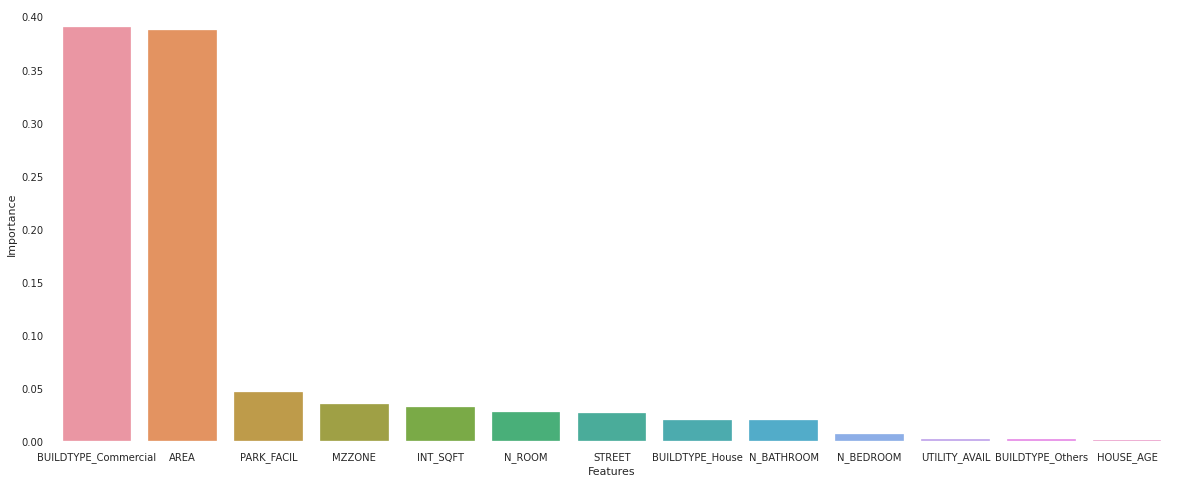

In [155]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Features',y = 'Importance', data = gain_importances)
plt.show()

In [156]:
gain_importances

,Features,Importance
0,BUILDTYPE_Commercial,0.390138
1,AREA,0.387855
2,PARK_FACIL,0.046500
3,MZZONE,0.035490
4,INT_SQFT,0.032421
5,N_ROOM,0.027759
6,STREET,0.026315
7,BUILDTYPE_House,0.020104
8,N_BATHROOM,0.019954
9,N_BEDROOM,0.006780


* AREA and BUILDTYPE_Commercial are having the highest feature imporantane using the gain type.


* UTILITY_AVAIL, HOUSE_AGE and BUILDTYPE_Others are having very less importance. 

* **Importance type = Weight**

> * The Weight is the percentage representing the relative number of times a particular feature occurs in the trees of the model.


> * plot_importance() uses importance type = Weight




<Figure size 1440x576 with 0 Axes>

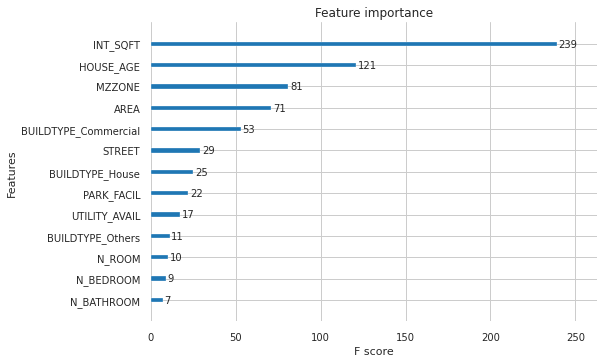

In [157]:
plt.figure(figsize=(20,8))
xgb.get_booster().feature_names = features
plot_importance(xgb)
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

* INT_SQFT has the highest feature importance using the weight type.

* N_BATHROOM, N_ROOM have less importance.

**The Importance type with Gain is the most relevant attribute to interpret the relative importance of each feature.**

‘Gain’ is the improvement in accuracy brought by a feature to the branches it is on. 

So, we take important features that are found using the importance type = Gain 

# **Creating Web App**

Creating a Web app for house price prediction using Streamlit.

In [158]:
#Training the model
bst_model = XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
bst_model.fit(x_train,y_train)

#checking the model with manually entered values
input_data = (0,1004,1,1,3,1,2,1,0,16031.0,1,0,0)

input_data_np_arr = np.asarray(input_data)
input_data_reshaped = input_data_np_arr.reshape(1,-1)
prediction = bst_model.predict(input_data_reshaped)
prediction

array([7171795.5], dtype=float32)

In [159]:
# saving the model using pickle
import pickle
filename = 'price_prediction_model.pkl'
pickle.dump(bst_model, open(filename,'wb'))

In [160]:
!pip install -q streamlit

     |████████████████████████████████| 9.2 MB 2.1 MB/s 
     |████████████████████████████████| 4.7 MB 38.8 MB/s 
     |████████████████████████████████| 164 kB 58.9 MB/s 
     |████████████████████████████████| 237 kB 49.6 MB/s 
     |████████████████████████████████| 78 kB 5.9 MB/s 
     |████████████████████████████████| 181 kB 57.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 


In [161]:
#web app file 
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import xgboost
import pandas as pd
import datetime

def price_prediction(input_data):

  input_data_np_arr = np.asarray(input_data)
  input_data_reshaped = input_data_np_arr.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  return prediction[0]


def main():
  st.title('Chennai House Price Prediction Web App')

  st.image("""https://miro.medium.com/max/720/0*YMZOAO8QE4bZ4_Rk.jpg""")

  st.header('Enter the house details:')

  Area = st.selectbox('Area',['Karapakkam','Adyar','Chrompet','Velachery','KK Nagar','Anna Nagar','T Nagar'])
  if(Area == 'Karapakkam'):
    area_no = 0
  elif(Area == 'Adyar'):
    area_no = 1
  elif(Area == 'Chrompet'):
    area_no = 2
  elif(Area == 'Velachery'):
    area_no = 3
  elif(Area == 'KK Nagar'):
    area_no = 4
  elif(Area == 'Anna Nagar'):
    area_no = 5
  elif(Area == 'T Nagar'):
    area_no = 6

  Sqft = st.text_input('Enter the Square Feet')

  n_bed = st.text_input('Enter the number of bedrooms')

  n_bath = st.text_input('Enter the number of bathrooms')

  n_room = st.text_input('Enter the number of rooms')

  park = st.selectbox('Is Parking facility available?',['Yes','No'])
  if park == 'Yes':
    park_no = 1
  else:
    park_no = 0
  
  utility = st.selectbox('Utility type',['ELO','No Sewer','All Public'])
  if utility == 'ELO':
    utility_no = 0
  elif utility == 'No Sewer':
    utility_no = 1
  else:
    utility_no = 2

  street = st.selectbox('Street Type',['No Access','Paved','Gravel'])
  if street == 'No Access':
    street_no = 0
  elif street == 'Paved':
    street_no = 1
  else:
    street_no = 2

  zone = st.selectbox('Zone Type',['A','C','I','RH','RL','RM'])
  if zone == 'A':
    zone_no = 0
  elif zone == 'C':
    zone_no = 1
  elif zone == 'I':
    zone_no = 2
  elif zone == 'RH':
    zone_no = 4
  elif zone == 'RL':
    zone_no = 5
  elif zone == 'RM':
    zone_no = 6

  build_date = st.date_input('Enter the house build date',min_value=datetime.date(year=1945, month=12, day=31))
  end_date = pd.to_datetime(datetime.date.today())
  age = end_date - pd.to_datetime(build_date)
  age = age / np.timedelta64(1,'D')

  buildtype = st.selectbox('Build type',['Commercial','House','Others'])  
  if(buildtype == 'Commercial'):
    commercial = 1
    house = 0
    other = 0
  elif(buildtype == 'House'):
    commercial = 0
    house = 1
    other = 0
  else:
    commercial = 0
    house = 0
    other = 1


  
  price = 0

  if st.button('Find the price'):
    price = price_prediction([area_no,Sqft,n_bed,n_bath,n_room,park_no,utility_no,street_no,zone_no,age,commercial,house,other])
    st.metric('Estmated Price, Rs',price)

if __name__ == '__main__':

  loaded_model = pickle.load(open('price_prediction_model.pkl','rb'))

  main()

Writing app.py


# **Conclusion**

* First, we cleaned the data and all the featurees into correct format.
* Then the imporant part, which is Exploratory Data Analysis. In this part, we used profiling to get the profil report. 
* We also considered all the features and found the features which have good linear relation with sales price. And we dropped the features which doesn't have relation with sales price.
* Factors that help sellers to fetch more money are also mentioned in EDA part.
* Label encoding is used for the features which have ordinal data and One hot encoding is used for features which have nominal data.
* Then we splitted the data and scaled it.  
* We trained the data with as many models as possible and found that the XGBosst is the best model using R2 score.
* XG Boost model will help customers to find a fair price for their homes.
* Web app was created with XG Boost model using Streamlit.
* [Click here](https://hashim28-chennai-house-sales-analysis-and-prediction-app-8xtq1y.streamlitapp.com/) to open the Web App for House price prediction